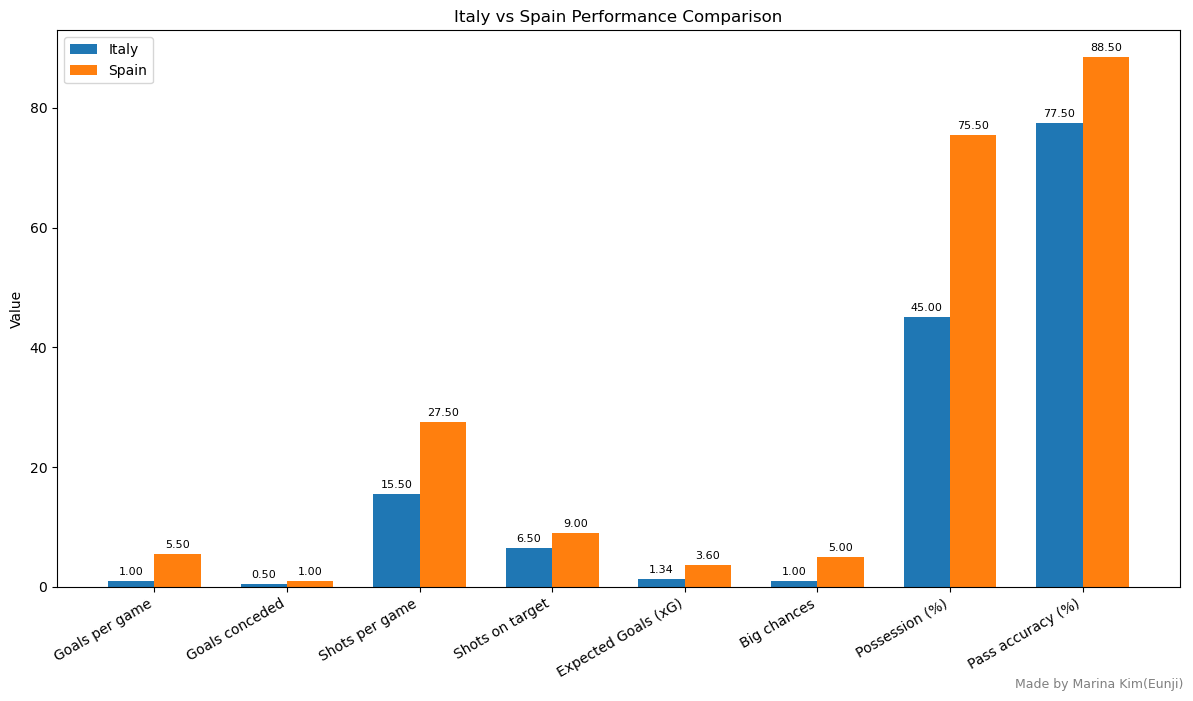

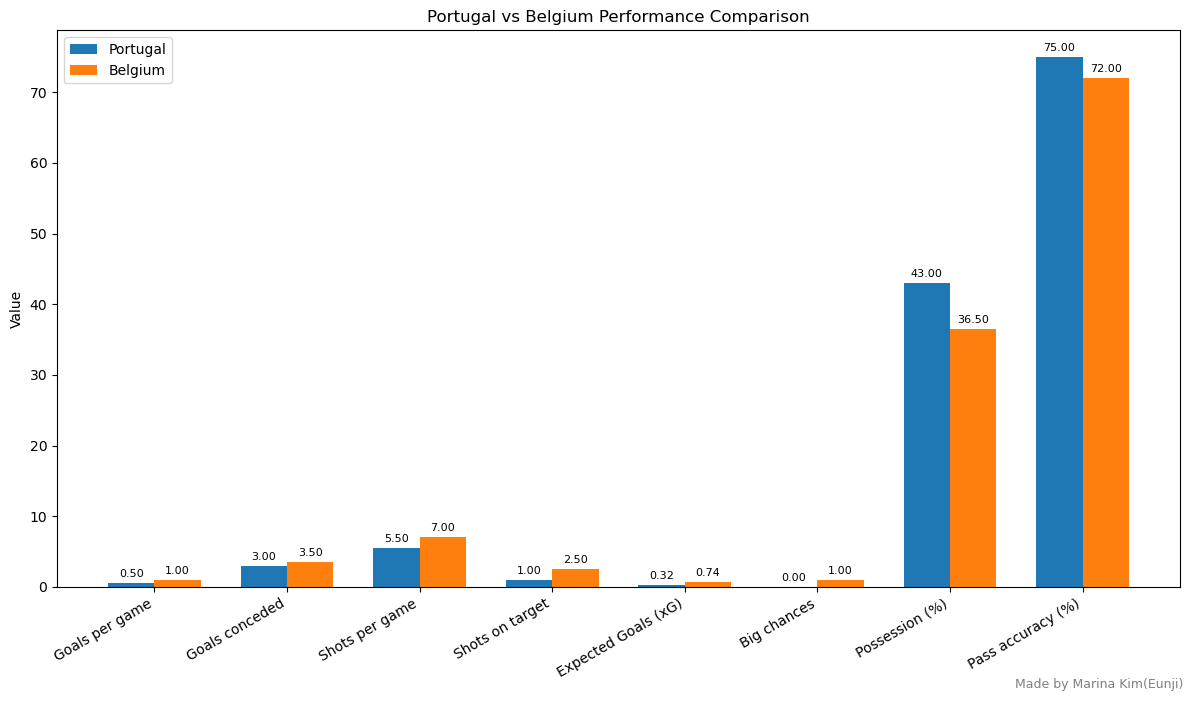

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일에서 데이터 읽기
df = pd.read_csv('stats_b.csv')

# 비교할 팀과 지표
categories = ['Goals per game', 'Goals conceded', 'Shots per game', 'Shots on target',
              'Expected Goals (xG)', 'Big chances', 'Possession (%)', 'Pass accuracy (%)']

def plot_comparison(team1, team2, df, filename):
    data1 = df[df['Team'] == team1][categories].values.flatten()
    data2 = df[df['Team'] == team2][categories].values.flatten()
    
    x = np.arange(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(x - width/2, data1, width, label=team1)
    rects2 = ax.bar(x + width/2, data2, width, label=team2)

    ax.set_ylabel('Value')
    ax.set_title(f'{team1} vs {team2} Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=30, ha='right')
    ax.legend()

    # 숫자 표시 함수
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 숫자 위치 조절
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    # 캡션
    plt.figtext(0.99, 0.01, 'Made by Marina Kim(Eunji)', horizontalalignment='right', fontsize=9, color='gray')

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# 노르웨이 vs 아이슬란드
plot_comparison('Italy', 'Spain', df, 'Itlay_Spain_comparison.png')

# 스위스 vs 핀란드
plot_comparison('Portugal', 'Belgium', df, 'Portugal_Belgium_comparison.png')
